# EDA - Aula prática 07/07

Tópicos estudados:
- Bubblesort
- Select K

In [1]:
import numpy as np
from time import time
import matplotlib.pyplot as plt

## BubbleSort

Código implementado baseado no pseudocódigo do homework 1.

In [2]:
def bubblesort(A):
    for i in range(len(A)):
        for j in range(len(A) - 1, i, -1):
            if A[j] < A[j - 1]:
                # Método para fazer "exchange" entre duas posições da lista
                A[j], A[j - 1] = A[j - 1], A[j]
    return A

In [3]:
def is_sorted(A):
    """
    Função que verifica se a lista está ordenada
    sorted(A) retorna uma cópia ordenada de A
    Essa função não altera a lista A    
    """
    return A == sorted(A)

In [4]:
# np.random é o pacote para gerar amostras aleatórias, calcular probabilidades
# Vamos gerar uma lista de 20 elementos, com inteiros aleatórios de 0 a 10000
# Vai retornar um np.array e vamos converter para list
A = np.random.randint(0, 10000, size = 20).tolist()

In [5]:
is_sorted(bubblesort(A))

True

Vamos verificar o tempo computacional desse algoritmo.

In [6]:
sizes = [100, 500, 1000, 5000, 10000]
times = []
for size in sizes:
    A = np.random.randint(0, 1000000, size = size).tolist()
    start = time()
    bubblesort(A)
    end = time()
    times.append(end - start)

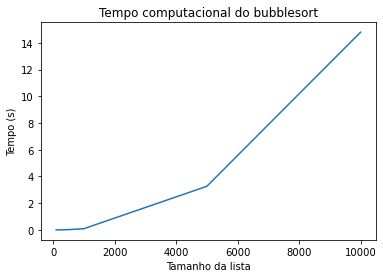

In [7]:
plt.plot(sizes, times)
plt.title("Tempo computacional do bubblesort")
plt.xlabel("Tamanho da lista")
plt.ylabel("Tempo (s)")
plt.show()

## Mergesort

O Mergesort será utilizado para o Select k, no entanto é pedido que vocês implementem o algoritmo para o homework 1, portanto irei deixar essa célula temporariamente vazia, e depois adiciono o mergesort.

In [8]:
def mergesort(A, l, r):
    ...
    

In [9]:
def our_sort(A):
    # mergesort
    A_ = A.copy()
    mergesort(A)
    return A

## Select k

Códigos baseados nos slides da L6 no Eclass.

O algoritmo *select k* recebe uma lista A e um inteiro k e retorna o k-ésimo menor elemento em A.

Uma maneira simples de obter o k-ésimo menor, é ordenar a lista inteira e retornar o elemento da posição k.

In [10]:
def select_k_naive(A, k):
    return our_sort(A)[k]

Uma outra maneira, é com o paradigma *Divide and conquer*, vamos dividir o problema em problemas menores. O problema inicial era obter o k-ésimo na lista A, e o problema "menor" será obter o k-ésimo em uma lista menor do que A.

Para isso, iremos separar a lista em duas partes, e verificar em qual das partes o k-ésimo menor provavelmente está.

In [11]:
def partition(A, p):
    """
    Função que recebe uma lista A e um índice p
    Cria a lista L de elementos menores ou iguais a A[p]
    Cria a lista R de elementos maiores que A[p]
    """
    L, R = [], []
    for i in range(len(A)):
        if i == p:
            continue
        elif A[i] <= A[p]:
            L.append(A[i])
        else:
            R.append(A[i])
    
    return L, A[p], R

Separando a lista em posições aleatórias.

In [12]:
def random_choose_pivot(A):
    """
    Recebe uma lista A e retorna um inteiro aleatório entre 0 e len(A) - 1 (incluindo)
    """
    return np.random.randint(0, len(A)) 

In [13]:
def select_k_random(A, k):
    """
    Separa a lista A em uma posição aleatória.
    E verifica em quais dos dois "lados" o k-menor estará.
    """
    if len(A) == 1:
        return A[0]
    
    p = random_choose_pivot(A)
    L, A_p, R = partition(A, p)

    if len(L) == k:
        return A_p
    elif len(L) > k:
        return select_k_random(L, k)
    else:
        return select_k_random(R, k - len(L) - 1)

Uma maneira de melhorar isso é separando em uma posição que não seja aleatória, que seja praticamente no "meio" de A para ter a garantia de que o problema "menor" vai ser perto de metade do problema original.

Essa maneira vai ser dividindo através da aproximação da mediana, a "mediana das medianas".

In [14]:
def smartly_choose_pivot(A):
    """
    Separa a lista A em listas menores de tamanho no máximo 5
    E encontra a mediana dessa lista usando o select_k
    Depois encontra a mediana das medianas
    Por fim, A.index(A_p) retorna o índice do elemento A_p em A
    """
    m = len(A) // 5
    candidate_pivots = []
    for i in range(m):
        A_g = A[i*5 : (i+1) * 5]
        p_i = select_k(A_g, 2)
        candidate_pivots.append(p_i)
    
    if m * 5 < len(A):
        A_g = A[m*5 :]
        p_i = select_k(A_g, len(A_g)//2)
        candidate_pivots.append(p_i)
        
    A_p = select_k(candidate_pivots, m//2)
    return A.index(A_p)

In [15]:
def select_k(A, k):
    """
    Select k com a divisão eficiente.
    """
    if len(A) < 100:
        return select_k_naive(A, k)

    p = smartly_choose_pivot(A)
    L, A_p, R = partition(A, p)
    if len(L) == k:
        return A[p]
    elif len(L) > k:
        return select_k(L, k)
    else:
        return select_k(R, k - len(L) - 1)

Comparação com as diferentes versões da select k:

- *naive*: ordena e retorna o k-ésimo
- *random*: separa de forma aleatória
- *smart*: ordena de forma "eficiente"

In [16]:
def run_tests(n_tests = 5, size = 1000):
    naive_times = []
    random_times = []
    smart_times = []
    for k in range(n_tests):
        A = np.random.randint(0, 100000, size = size).tolist()
        #A = np.random.normal(0, 10, size = size).tolist()
        #A = np.random.beta(1, 2, size).tolist()
        k = int(np.random.randint(0, size))

        start = time()
        naive_solution = select_k_naive(A, k)
        naive_times.append(time() - start)

        start = time()
        random_solution = select_k_random(A, k)
        random_times.append(time() - start)
        
        start = time()
        smart_solution = select_k(A, k)
        smart_times.append(time() - start)
        
        # Verifica se as soluções são iguais
        assert naive_solution == random_solution
        assert naive_solution == smart_solution
    
    return np.mean(naive_times), np.mean(random_times), np.mean(smart_times)

In [17]:
def plot_times(n_tests = 5, sizes = [100, 500, 1000, 5000, 10000, 50000, 100000, 500000]):
    naive_times = []
    random_times = []
    smart_times = []
    for size in sizes:
        n, r, s = run_tests(n_tests, size)
        naive_times.append(n)
        random_times.append(r)
        smart_times.append(s)

    plt.plot(sizes, naive_times, label = 'naive')
    plt.plot(sizes, random_times, label = 'random')
    plt.plot(sizes, smart_times, label = 'smart')
    plt.legend()
    plt.show()

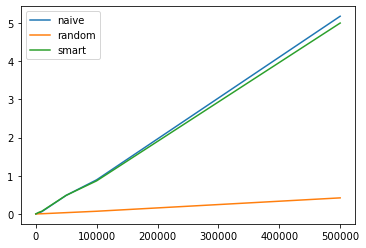

In [18]:
plot_times()

Ué, mas a versão que deveria ser melhor, foi mais lento, o que ocorreu?

Aqui acontece que apesar do resultado teórico, as funções de `append`, `index`, recursões, acabam tornando o código menos eficiente do que apenas ordernar com o Mergesort.

Vou criar agora um código mais "confuso", no entanto, utilizando da biblioteca numpy que possui algoritmos implementados em C extramemente eficientes.

In [22]:
def partition_numpy(A, p):
    A_p = A[p]
    A_ = np.concatenate([A[:p], A[p+1:]])
    return A_[A_ <= A_p], A_p, A_[A_ > A_p]    

In [23]:
def smartly_choose_pivot_numpy(A):
    m = len(A) // 5
    candidate_pivots = []

    for i in range(m):
        A_ = A[i*5 : (i+1) * 5]
        k_ = len(A_)//2
        p_ = select_k_numpy(A_, k_)
        candidate_pivots.append(p_)
    
    if m * 5 < len(A):
        A_ = A[5*m:]
        k_ = len(A_)//2
        p_ = select_k_numpy(A_, k_)
        candidate_pivots.append(p_)
    
    A_p = select_k_numpy(candidate_pivots, m//2)
    return np.where(A == A_p)[0][0]

In [27]:
def select_k_numpy(A, k):
    """
    Select k com a divisão eficiente.
    """
    if len(A) < 100:
        return np.sort(A)[k]
        
    k_ = k
    A_ = A.copy()
    while len(A_) > 100:
        p = smartly_choose_pivot_numpy(A_)
        L, A_p, R = partition_numpy(A_, p)

        if len(L) == k_:
            return A_p
        elif len(L) > k_:
            A_ = L
        else:
            A_ = R
            k_ = k_ - len(L) - 1
    
    return np.sort(A)[k]

In [28]:
def run_tests(n_tests = 5, size = 1000):
    naive_times = []
    random_times = []
    smart_times = []
    smart_numpy_times = []

    for k in range(n_tests):
        A = np.random.randint(0, 100000, size = size).tolist()
        #A = np.random.normal(0, 10, size = size).tolist()
        #A = np.random.beta(1, 2, size).tolist()
        k = int(np.random.randint(0, size))

        start = time()
        naive_solution = select_k_naive(A, k)
        naive_times.append(time() - start)

        start = time()
        random_solution = select_k_random(A, k)
        random_times.append(time() - start)
        
        start = time()
        smart_solution = select_k(A, k)
        smart_times.append(time() - start)

        A = np.array(A)
        start = time()
        smart_numpy_solution = select_k_numpy(A, k)
        smart_numpy_times.append(time() - start)

        
        # Verifica se as soluções são iguais
        assert naive_solution == random_solution
        assert naive_solution == smart_solution
        assert naive_solution == smart_numpy_solution
    
    return np.mean(naive_times), np.mean(random_times), np.mean(smart_times), np.mean(smart_numpy_times)

def plot_times(n_tests = 5, sizes = [100, 500, 1000, 5000, 10000, 50000, 100000, 500000]):
    naive_times = []
    random_times = []
    smart_times = []
    smart_numpy_times = []
    for size in sizes:
        n, r, s, s_ = run_tests(n_tests, size)
        naive_times.append(n)
        random_times.append(r)
        smart_times.append(s)
        smart_numpy_times.append(s_)

    plt.plot(sizes, naive_times, label = 'naive')
    plt.plot(sizes, random_times, label = 'random')
    plt.plot(sizes, smart_times, label = 'smart')
    plt.plot(sizes, smart_numpy_times, label = 'smart with numpy')
    plt.legend()
    plt.show()

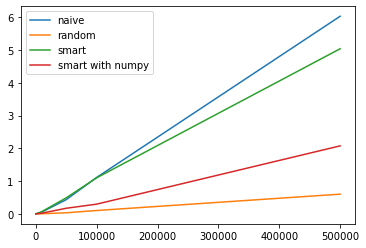

In [29]:
plot_times()

Conseguimos obter resultados melhores com as funções em numpy. No entanto, a função *random* ainda continua mais rápida, por quê?

Nós provamos a eficiência do algoritmo que utilizando a média das médias, mas não estudamos a complexidade da versão aleatória. Veremos mais tarde na disciplina que apesar de o pior tempo possível da versão aleatória ser $O(n^2)$, é improvável que isso ocorra.